In [16]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [17]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int

    equation: str
    discriminant: float
    result  : str

In [18]:
def show_equation_func(state: QuadState):
    equation= f'{state["a"]}x2{state["b"]}x{state["c"]}'
    return {'equation':equation}

def calculate_descriminant_func(state: QuadState):
    discriminant=state["b"]**2-(4*state["a"]*state["c"])
    return {'discriminant':discriminant}

In [19]:
def real_roots_func(state: QuadState):
    root1 = (-state["b"]+state["discriminant"]**0.5)/(2*state["a"])
    root2 = (-state["b"]-state["discriminant"]**0.5)/(2*state["a"])
    result = f'The roots are {root1} and {root2}'
    return {'result':result}

def repeated_roots_func(state: QuadState):
    root1 = (-state["b"])/(2*state["a"])
    result = f'Only repeating root is {root1}'
    return {'result':result}


def no_real_roots_func(state: QuadState):
    result = f'No real roots'
    return {'result':result}

In [20]:
def check_condition(state: QuadState)-> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state['discriminant']>0:
        return "real_roots"
    elif state["discriminant"]==0:
        return "repeated_roots"
    else:
        return "no_real_roots"

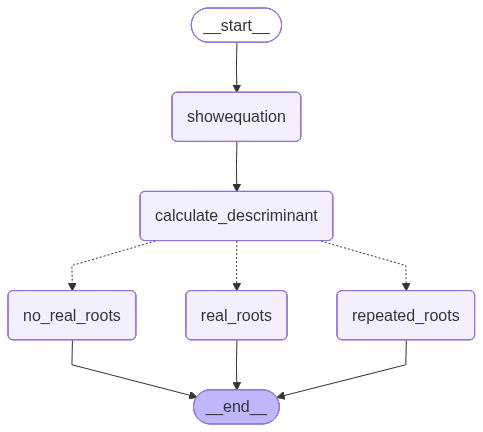

In [21]:
graph=StateGraph(QuadState)

graph.add_node('showequation', show_equation_func)
graph.add_node('calculate_descriminant', calculate_descriminant_func)
graph.add_node('real_roots', real_roots_func)
graph.add_node('repeated_roots', repeated_roots_func)
graph.add_node('no_real_roots', no_real_roots_func)

graph.add_edge(START, 'showequation')
graph.add_edge( 'showequation','calculate_descriminant')

graph.add_conditional_edges('calculate_descriminant', check_condition)
graph.add_edge( 'real_roots', END)
graph.add_edge( 'no_real_roots', END)
graph.add_edge( 'repeated_roots', END)

workflow = graph.compile()
graph.compile()

In [24]:
initial_state = {
    'a':2,
    'b':4,
    'c':2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x24x2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}